## IBM final Project Capstone - Explore the Neighborhoods of Rome, Italy
#### Author Lucia Casucci
#### April 2020


#### This notebook will be used to display the work performed to solve the IBM Project Capstone Project

In this assignment, I will explore, segment, and cluster the neighborhoods in the city of Rome. I am interested in finding out what is the best location to open a modern wine bar.

For the Rome neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods (Municipi) in Rome, the capital of Italy - see link 'https://it.wikipedia.org/wiki/Municipi_di_Roma'. 

I will scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format.

I will convert addresses into their equivalent latitude and longitude values using the geocoder library. Also, I will use the Foursquare API to explore neighborhoods in Rome. I will use the explore function to get the most common venue categories in each neighborhood,check out their ratings,and the overall count of venues to understand the traffic. 

I will then use this feature to group the neighborhoods into clusters.I will use the k-means clustering algorithm to complete this task. 

Finally, I will use the Folium library to visualize the neighborhoods in Rome and their emerging clusters, and identify the best one to open a modern wine bar.


### Scrape the webpage and get the Rome Neighborhoods in a dataframe

In [21]:
#import the libraries
import pandas as pd 
import numpy as np

from bs4 import BeautifulSoup
import requests
import pandas as pd
import geopy
from geopy.geocoders import Nominatim



#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
# how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k video
from bs4 import BeautifulSoup 
import pandas as pd
import requests

print('Libraries imported.')

Libraries imported.


In [22]:
def get_geo_info(place_name):
    """
    Gets coordinates and address for a given place name using geopy.

    :param place_name: Name of place to search for, eg "San Francisco"
    :return: Location object with latitude, longitude and name attributes
    """

    from geopy.geocoders import Nominatim

    # Create geo_locator object instance
    geo_locator = Nominatim()

    # Attempt to obtain geo data for given place name
    try:
        location = geo_locator.geocode(place_name)
    except Exception:
        raise Exception("Location error")

    if not location:
        raise Exception("Location error")

    return location 

In [23]:
RM_coordinates = get_geo_info('Rome')

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if sys.path[0] == '':


In [24]:
RM_coordinates

Location(Roma, Roma Capitale, Italia, (41.8933203, 12.4829321, 0.0))

In [25]:
latitude = 41.8933203
longitude = 12.4829321
rome_center = [latitude, longitude ]
#print('The geograpical coordinate of {} are {}, {}.'.format(bucharest_address, latitude, longitude))

In [26]:
dr = pd.read_html('https://it.wikipedia.org/wiki/Municipi_di_Roma')[0]
dr.head()

,Municipio,Popolazione(ab.),Superficie(km²),Densità(ab./km²),Presidente
0,I Centro Storico,170 328,2009,"8 478,25",Sabrina Alfonsi (PD)
1,II Parioli/Nomentano,168 410,1966,"8 566,12",Francesca Del Bello (PD)
2,III Monte Sacro,205 832,9803,"2 099,68",Giovanni Caudo (centrosinistra)
3,IV Tiburtina,175 921,4894,"3 594,63",Roberta Della Casa (M5S)
4,V Prenestino/Centocelle,245 073,2692,"9 103,75",Giovanni Boccuzzi (M5S)


In [27]:
dr.drop(dr.loc[dr['Municipio'] ==  'Totale'].index, inplace=True)

In [28]:
dr.drop(['Presidente'], axis = 1,inplace=True) 

In [29]:
rome_address = 'Rome,Italy'

geolocator = Nominatim(user_agent="Rome_explorer")
location = geolocator.geocode(rome_address)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(rome_address, latitude, longitude))

The geograpical coordinate of Rome,Italy are 41.8933203, 12.4829321.


### Get the neighborhoods coordinates with geocoder and map them with Folium

In [30]:
import geocoder

In [31]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,rome_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in dr["Municipio"].tolist() ]

df1_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
dr['Latitude'] = df1_coords['Latitude']
dr['Longitude'] = df1_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
dr.head()

Geographical coordinates of five neighborhoods are as below


,Municipio,Popolazione(ab.),Superficie(km²),Densità(ab./km²),Latitude,Longitude
0,I Centro Storico,170 328,2009,"8 478,25",41.90577,12.48039
1,II Parioli/Nomentano,168 410,1966,"8 566,12",41.91447,12.52210
2,III Monte Sacro,205 832,9803,"2 099,68",41.94037,12.53273
3,IV Tiburtina,175 921,4894,"3 594,63",41.90980,12.52784
4,V Prenestino/Centocelle,245 073,2692,"9 103,75",41.88412,12.56619


In [32]:
#create map of Rome neighborhoods using latitude and longitude values
map_Rome2= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(dr['Latitude'], dr['Longitude'], dr['Municipio']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Rome2)  
    
map_Rome2

### Using Foursquare API retrieve 100 venues max for every neighbourhood

In [33]:
LIMIT = 100

CLIENT_ID = 'PQ0NUTKW2A1RN5VSFE42RCJVODXBVNKIXUYDLTFQLZDBV3WR' # your Foursquare ID
CLIENT_SECRET = 'AZSSVV0E3P3QVWT1TRSX0RVLU1SSLTXYYPGYFF5ZRIITXZIY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues2 = getNeighborhoodVenues (dr['Latitude'], dr['Longitude'], dr['Municipio'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues2['VenueCategory'].unique())))
neighborhood_venues2.head()

Your credentails:
CLIENT_ID: PQ0NUTKW2A1RN5VSFE42RCJVODXBVNKIXUYDLTFQLZDBV3WR
CLIENT_SECRET:AZSSVV0E3P3QVWT1TRSX0RVLU1SSLTXYYPGYFF5ZRIITXZIY
There are 145 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,I Centro Storico,41.90577,12.48039,Venchi Cioccogelateria,4df3880c7d8b18e1722f3125,41.906317,12.480129,64,Ice Cream Shop
1,I Centro Storico,41.90577,12.48039,Piazza di Spagna,4adcdac6f964a520295321e3,41.906046,12.482057,141,Plaza
2,I Centro Storico,41.90577,12.48039,Fontana della Barcaccia,4adcdac9f964a520355421e3,41.905763,12.482283,156,Fountain
3,I Centro Storico,41.90577,12.48039,Louis Vuitton,4f218a1be4b0b69d78a4f6ff,41.903849,12.478822,250,Boutique
4,I Centro Storico,41.90577,12.48039,Tartufi & Friends,5151e433e4b0b55cd32cfcbe,41.904404,12.479728,161,Italian Restaurant


In [34]:
neighborhood_venues3 = neighborhood_venues2.copy()

#### What are the top 10 venues overall in the dataset?

In [35]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues2[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Italian Restaurant,82
Pizza Place,57
Café,48
Ice Cream Shop,37
Hotel,37
Plaza,33
Restaurant,23
Pub,21
Cocktail Bar,17


In [36]:
# one hot encoding
rome_onehot = pd.get_dummies(neighborhood_venues2[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rome_onehot['Neighborhood'] = neighborhood_venues2['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rome_onehot.columns[-1]] + list(rome_onehot.columns[:-1])
rome_onehot = rome_onehot[fixed_columns]

rome_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Concert Hall,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Light Rail Station,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music School,Music Store,Music Venue,Nightclub,Noodle House,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,Rock Club,Roman Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Sicilian Restaurant,Skating Rink,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery
0,I Centro Storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,I Centro Storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,I Centro Storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,I Centro Storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,I Centro Storico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
rome_grouped = rome_onehot.groupby('Neighborhood').mean().reset_index()

#### What are the top 5 venues for each neighborhood?

In [38]:
num_top_venues = 5

for hood in rome_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = rome_grouped[rome_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----I Centro Storico----
                venue  freq
0               Hotel  0.14
1  Italian Restaurant  0.14
2               Plaza  0.08
3      Sandwich Place  0.07
4      Ice Cream Shop  0.07


----II Parioli/Nomentano----
                      venue  freq
0                  Platform  0.15
1                     Hotel  0.12
2        Italian Restaurant  0.08
3            Ice Cream Shop  0.08
4  Mediterranean Restaurant  0.05


----III Monte Sacro----
                venue  freq
0         Pizza Place  0.09
1               Plaza  0.07
2  Italian Restaurant  0.07
3                Café  0.07
4  Chinese Restaurant  0.06


----IV Tiburtina----
                 venue  freq
0          Pizza Place  0.11
1                 Café  0.06
2  Japanese Restaurant  0.05
3   Italian Restaurant  0.05
4                Hotel  0.05


----IX Eur----
                venue  freq
0                Café  0.25
1         Supermarket  0.12
2               Hotel  0.08
3  Italian Restaurant  0.08
4                Park  0

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rome_grouped['Neighborhood']

for ind in np.arange(rome_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rome_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I Centro Storico,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site
1,II Parioli/Nomentano,Platform,Hotel,Ice Cream Shop,Italian Restaurant,Art Museum,Park,Mediterranean Restaurant,Cocktail Bar,Pub,Sandwich Place
2,III Monte Sacro,Pizza Place,Café,Italian Restaurant,Plaza,Cocktail Bar,Chinese Restaurant,Japanese Restaurant,Bistro,Ice Cream Shop,Sandwich Place
3,IV Tiburtina,Pizza Place,Café,Hotel,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Pub,Cocktail Bar,Plaza,Seafood Restaurant
4,IX Eur,Café,Supermarket,Hotel,Park,Italian Restaurant,Gas Station,Sporting Goods Shop,Sandwich Place,Fast Food Restaurant,Restaurant


## Use kmeans to cluster the neighborhoods

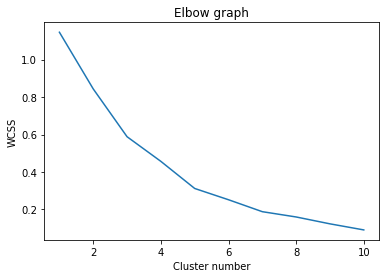

In [41]:
#What is the optimal number of clusters? 

from sklearn.cluster import KMeans
import matplotlib

rome_grouped_clustering = rome_grouped.drop('Neighborhood', 1)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(rome_grouped_clustering)
    wcss.append(kmeans.inertia_)


# In[221]:


plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [42]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 8

#toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rome_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 5, 0, 0, 7, 1, 0, 0, 0, 6])

#### Which cluster does each neighbourhood belongs to?

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rome_merged = dr.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Municipio')

rome_merged

# check the last columns!

,Municipio,Popolazione(ab.),Superficie(km²),Densità(ab./km²),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I Centro Storico,170 328,2009,"8 478,25",41.905770,12.480390,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site
1,II Parioli/Nomentano,168 410,1966,"8 566,12",41.914470,12.522100,5,Platform,Hotel,Ice Cream Shop,Italian Restaurant,Art Museum,Park,Mediterranean Restaurant,Cocktail Bar,Pub,Sandwich Place
2,III Monte Sacro,205 832,9803,"2 099,68",41.940370,12.532730,0,Pizza Place,Café,Italian Restaurant,Plaza,Cocktail Bar,Chinese Restaurant,Japanese Restaurant,Bistro,Ice Cream Shop,Sandwich Place
3,IV Tiburtina,175 921,4894,"3 594,63",41.909800,12.527840,0,Pizza Place,Café,Hotel,Italian Restaurant,Japanese Restaurant,Ice Cream Shop,Pub,Cocktail Bar,Plaza,Seafood Restaurant
4,V Prenestino/Centocelle,245 073,2692,"9 103,75",41.884120,12.566190,0,Pizza Place,Supermarket,Wine Bar,Shopping Mall,Italian Restaurant,Electronics Store,Plaza,Burger Joint,Cocktail Bar,Café
5,VI Roma delle Torri,257 556,11388,"2 261,64",41.863824,12.471525,0,Italian Restaurant,Café,Nightclub,Pizza Place,Cocktail Bar,Pub,Ice Cream Shop,Gym,Restaurant,Fast Food Restaurant
6,VII Appio-Latino/Tuscolana/Cinecittà,307 184,4584,"6 701,22",41.874610,12.513330,0,Pizza Place,Italian Restaurant,Café,Plaza,Ice Cream Shop,Trattoria/Osteria,Pub,Dessert Shop,Hotel,Restaurant
7,VIII Appia Antica,130 784,4715,"2 773,79",41.805476,12.572886,6,Hotel,Outdoors & Recreation,Furniture / Home Store,Italian Restaurant,Restaurant,Automotive Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market
8,IX Eur,183 343,18331,"1 000,18",41.835420,12.505250,7,Café,Supermarket,Hotel,Park,Italian Restaurant,Gas Station,Sporting Goods Shop,Sandwich Place,Fast Food Restaurant,Restaurant
9,X Ostia/Acilia,231 701,15074,"1 537,09",41.783400,12.365110,0,Plaza,Italian Restaurant,Gym Pool,Flower Shop,Café,Chinese Restaurant,Electronics Store,Clothing Store,Supermarket,Bus Station


In [44]:
rome_merged.rename(columns={'Popolazione(ab.)':'Population'}, inplace=True)

In [45]:
rome_merged.Population = pd.to_numeric(rome_merged.Population, errors='coerce')

### How many bars are there in all the neighbourhoods and how many of these are wine bars?

In [46]:
restaurant_list =['Bar', 'Brewery','Cocktail Bar','Gastropub','Sports Bar','Pub','Winery','Wine Bar']
turkish_restaurant_list = ['Wine Bar']

# Filter restaurants 
    
neighborhood_venues2['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues2['RestFlag'] = neighborhood_venues2['RestFlag'] | neighborhood_venues2['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues2[neighborhood_venues2['RestFlag'] == True].iloc[:,:-1]
turkish_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(turkish_restaurant_list) ]

print('Total number of bars:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Wine Bars:', len(turkish_restaurants['VenueId'].unique()))
print('Percentage of Wine Bars: {:.2f}%'.format(len(turkish_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))

Total number of bars: 70
Total number of Wine Bars: 9
Percentage of Wine Bars: 12.86%


11 neighborhoods do not have any Wine Bar


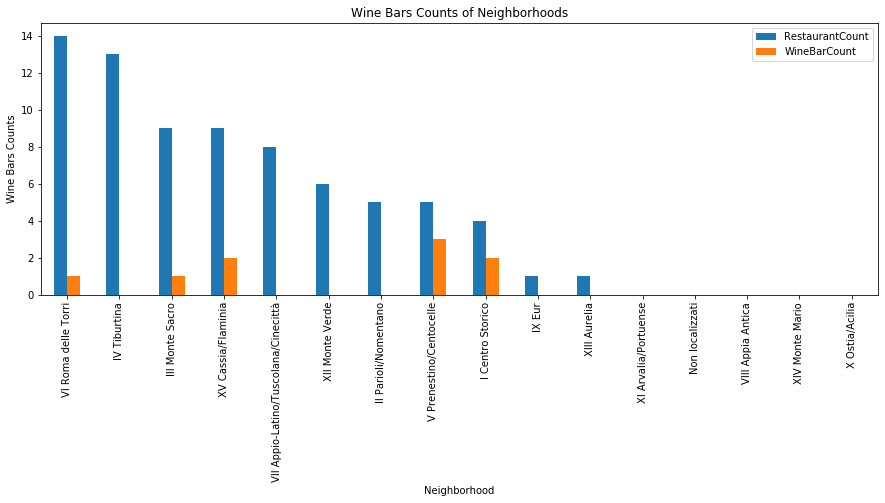

In [47]:
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues2['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Turkish restaurants in each Neighborhood
df_turk_rest_counts =  turkish_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "WineBarCount"})[['WineBarCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues2['Neighborhood']) - set(turkish_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_turk_rest_counts = df_turk_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'WineBarCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_turk_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_turk_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Wine Bar'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','WineBarCount']].plot(kind='bar',figsize=(15,5))
plt.title('Wine Bars Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Wine Bars Counts')
plt.show()

### How many venues does each neighbourhood have? This is a traffic indicator

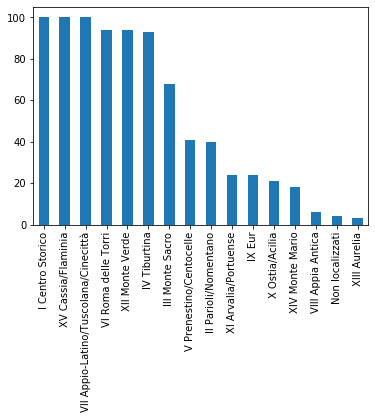

In [48]:
neighborhood_venues2['Neighborhood'].value_counts().plot(kind='bar')

### Use foursquare API to retrieve the venues ratings and likes

In [49]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_venues2['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4df3880c7d8b18e1722f3125,9.0,304.0
1,4adcdac6f964a520295321e3,8.9,3790.0
2,4adcdac9f964a520355421e3,8.8,134.0
3,4f218a1be4b0b69d78a4f6ff,9.1,148.0
4,5151e433e4b0b55cd32cfcbe,8.6,94.0


In [50]:
#merge raitings to restaurants 
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_raitings)
neighborhood_restaurants.head()


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,I Centro Storico,41.90577,12.48039,Il Giardino dell'Eden,4adcdac3f964a520815221e3,41.906599,12.486352,502,Cocktail Bar,8.4,22.0
1,I Centro Storico,41.90577,12.48039,Cipasso,5b2fa144610f04002c060e48,41.901772,12.473529,721,Wine Bar,NaN,NaN
2,I Centro Storico,41.90577,12.48039,Il Brillo Parlante,4adcdac1f964a520f05121e3,41.909204,12.477252,462,Wine Bar,NaN,NaN
3,I Centro Storico,41.90577,12.48039,Stravinskij,4adcdac3f964a520755221e3,41.910210,12.477797,538,Hotel Bar,NaN,NaN
4,II Parioli/Nomentano,41.91447,12.52210,Coffee Pot,541391d8498ec124d5bfb498,41.913817,12.522222,73,Cocktail Bar,NaN,NaN


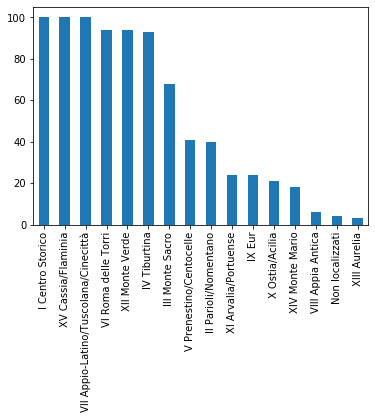

In [51]:
neighborhood_venues2['Neighborhood'].value_counts().plot(kind='bar')

#### What is the mean number of likes of the bar type venue in each Neighbourhood?

In [52]:
neighborhood_restaurants[['VenueLikes','Neighborhood']].groupby('Neighborhood').mean()

,VenueLikes
Neighborhood,
I Centro Storico,22.0
II Parioli/Nomentano,NaN
III Monte Sacro,NaN
IV Tiburtina,NaN
IX Eur,NaN
V Prenestino/Centocelle,NaN
VI Roma delle Torri,NaN
VII Appio-Latino/Tuscolana/Cinecittà,NaN
XII Monte Verde,NaN


#### What is the mean number of ratings of the bar type venue in each Neighbourhood?

In [53]:
neighborhood_restaurants[['VenueRating','Neighborhood']].drop_duplicates().groupby('Neighborhood').mean()


,VenueRating
Neighborhood,
I Centro Storico,8.4
II Parioli/Nomentano,NaN
III Monte Sacro,NaN
IV Tiburtina,NaN
IX Eur,NaN
V Prenestino/Centocelle,NaN
VI Roma delle Torri,NaN
VII Appio-Latino/Tuscolana/Cinecittà,NaN
XII Monte Verde,NaN


In [54]:
rome_merge= rome_merged.rename(columns={'Municipio': 'Neighborhood',
                        })

In [55]:
final_result= pd.merge(rome_merge, neighborhood_venues2, on='Neighborhood', how='inner')


In [56]:
final_result.head()

,Neighborhood,Population,Superficie(km²),Densità(ab./km²),Latitude_x,Longitude_x,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude_y,Longitude_y,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,I Centro Storico,NaN,2009,"8 478,25",41.90577,12.48039,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site,41.90577,12.48039,Venchi Cioccogelateria,4df3880c7d8b18e1722f3125,41.906317,12.480129,64,Ice Cream Shop,False
1,I Centro Storico,NaN,2009,"8 478,25",41.90577,12.48039,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site,41.90577,12.48039,Piazza di Spagna,4adcdac6f964a520295321e3,41.906046,12.482057,141,Plaza,False
2,I Centro Storico,NaN,2009,"8 478,25",41.90577,12.48039,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site,41.90577,12.48039,Fontana della Barcaccia,4adcdac9f964a520355421e3,41.905763,12.482283,156,Fountain,False
3,I Centro Storico,NaN,2009,"8 478,25",41.90577,12.48039,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site,41.90577,12.48039,Louis Vuitton,4f218a1be4b0b69d78a4f6ff,41.903849,12.478822,250,Boutique,False
4,I Centro Storico,NaN,2009,"8 478,25",41.90577,12.48039,3,Hotel,Italian Restaurant,Plaza,Sandwich Place,Ice Cream Shop,Boutique,Fountain,Trattoria/Osteria,Monument / Landmark,Historic Site,41.90577,12.48039,Tartufi & Friends,5151e433e4b0b55cd32cfcbe,41.904404,12.479728,161,Italian Restaurant,False


In [57]:
final_result.drop(final_result.columns[[7,8,9,10,11,12,13,14,15,16,17,18,19]], axis = 1, inplace = True) 

In [58]:
final_result.drop(final_result.columns[[4,5]], axis = 1, inplace = True) 

In [59]:

final_result.head()


,Neighborhood,Population,Superficie(km²),Densità(ab./km²),Cluster Labels,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag
0,I Centro Storico,NaN,2009,"8 478,25",3,4df3880c7d8b18e1722f3125,41.906317,12.480129,64,Ice Cream Shop,False
1,I Centro Storico,NaN,2009,"8 478,25",3,4adcdac6f964a520295321e3,41.906046,12.482057,141,Plaza,False
2,I Centro Storico,NaN,2009,"8 478,25",3,4adcdac9f964a520355421e3,41.905763,12.482283,156,Fountain,False
3,I Centro Storico,NaN,2009,"8 478,25",3,4f218a1be4b0b69d78a4f6ff,41.903849,12.478822,250,Boutique,False
4,I Centro Storico,NaN,2009,"8 478,25",3,5151e433e4b0b55cd32cfcbe,41.904404,12.479728,161,Italian Restaurant,False


In [60]:
crestaurant_ratings= pd.merge(final_result, restaurants_raitings, on='VenueId', how='inner')

In [61]:
crestaurant_ratings.head()

,Neighborhood,Population,Superficie(km²),Densità(ab./km²),Cluster Labels,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,RestFlag,VenueRating,VenueLikes
0,I Centro Storico,NaN,2009,"8 478,25",3,4df3880c7d8b18e1722f3125,41.906317,12.480129,64,Ice Cream Shop,False,9.0,304.0
1,I Centro Storico,NaN,2009,"8 478,25",3,4adcdac6f964a520295321e3,41.906046,12.482057,141,Plaza,False,8.9,3790.0
2,I Centro Storico,NaN,2009,"8 478,25",3,4adcdac9f964a520355421e3,41.905763,12.482283,156,Fountain,False,8.8,134.0
3,I Centro Storico,NaN,2009,"8 478,25",3,4f218a1be4b0b69d78a4f6ff,41.903849,12.478822,250,Boutique,False,9.1,148.0
4,I Centro Storico,NaN,2009,"8 478,25",3,5151e433e4b0b55cd32cfcbe,41.904404,12.479728,161,Italian Restaurant,False,8.6,94.0


In [62]:
crestaurant_ratings[['VenueLikes','Cluster Labels']].groupby('Cluster Labels').mean()

,VenueLikes
Cluster Labels,
0,NaN
1,NaN
2,NaN
3,266.72
4,NaN
5,NaN
6,NaN
7,NaN


In [74]:
crestaurant_ratings[['VenueLikes','Cluster Labels']].drop_duplicates().groupby('Cluster Labels').sum()


,VenueLikes
Cluster Labels,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,20755.0
6,0.0
7,0.0


### How many venues are there in each cluster?

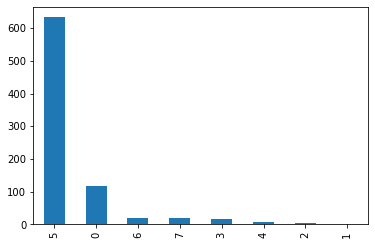

In [48]:
final_result['Cluster Labels'].value_counts().plot(kind='bar')

In [49]:
# one hot encoding
rome_onehot2 = pd.get_dummies(final_result[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rome_onehot2['Cluster Labels'] = final_result['Cluster Labels'] 

# move neighborhood column to the first column
fixed_columns = [rome_onehot2.columns[-1]] + list(rome_onehot2.columns[:-1])
rome_onehot2 = rome_onehot2[fixed_columns]

rome_onehot2.head()

,Cluster Labels,Accessories Store,African Restaurant,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Camera Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Concert Hall,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Light Rail Station,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music School,Music Store,Music Venue,Nightclub,Noodle House,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roman Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Sicilian Restaurant,Skating Rink,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Yoga Studio
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
rome_grouped2 = rome_onehot2.groupby('Cluster Labels').mean().reset_index()

In [51]:
rome_grouped2

,Cluster Labels,Accessories Store,African Restaurant,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Auditorium,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Stadium,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Camera Store,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Concert Hall,Construction & Landscaping,Cosmetics Shop,Cupcake Shop,Dance Studio,Dessert Shop,Diner,Donut Shop,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Kebab Restaurant,Light Rail Station,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Music School,Music Store,Music Venue,Nightclub,Noodle House,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Plaza,Pool,Pub,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Roman Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Sicilian Restaurant,Skating Rink,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Toy / Game Store,Train Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Winery,Yoga Studio
0,0,0.00000,0.00000,0.008475,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.008475,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.016949,0.008475,0.016949,0.008475,0.00000,0.110169,0.00000,0.000000,0.00000,0.008475,0.008475,0.008475,0.00000,0.000000,0.0,0.00000,0.000000,0.00000,0.025424,0.000000,0.016949,0.008475,0.008475,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.033898,0.00000,0.000000,0.00000,0.00000,0.008475,0.00000,0.008475,0.000000,0.000000,0.00000,0.00000,0.008475,0.016949,0.008475,0.000000,0.000000,0.00000,0.00000,0.025424,0.00000,0.076271,0.00000,0.110169,0.000000,0.00000,0.00000,0.008475,0.008475,0.000000,0.008475,0.025424,0.000000,0.00000,0.000000,0.008475,0.00000,0.00000,0.000000,0.008475,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.016949,0.00000,0.00000,0.000000,0.144068,0.000000,0.042373,0.000000,0.025424,0.00000,0.008475,0.050847,0.00000,0.00000,0.00000,0.000000,0.000000,0.008475,0.00000,0.000000,0.00000,0.00000,0.008475,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.016949,0.008475,0.00000,0.008475,0.00000,0.016949,0.008475,0.000000,0.008475,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
1,1,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.5,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,

In [52]:
rome_grouped2.rename(columns={'Cluster Labels':'Cluster_Labels'}, inplace=True)

In [ ]:
crestaurant_ratings[['VenueLikes','Cluster Labels']].drop_duplicates().groupby('Cluster Labels').mean()


### What is the most common venue for each cluster? 

In [53]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Cluster_Labels','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(rome_grouped2.shape[0]):
    venues_most.loc[ind, 'Cluster_Labels'] = rome_grouped2.iloc[ind].Cluster_Labels
    venues_most.loc[ind, 'Total Number of Venues'] = rome_grouped2.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(rome_grouped2.iloc[ind, 1:], num_top_venues)

venues_most

,Cluster_Labels,Total Number of Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,1,Pizza Place,Italian Restaurant,Café,Ice Cream Shop,Restaurant,Plaza,Food,Dessert Shop,Pub,Mediterranean Restaurant
1,1,1,Construction & Landscaping,Pizza Place,Ethiopian Restaurant,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
2,2,1,Cosmetics Shop,Fast Food Restaurant,Gym / Fitness Center,Grocery Store,Ethiopian Restaurant,Flower Shop,Flea Market,Fish Market,Farmers Market,Falafel Restaurant
3,3,1,Italian Restaurant,Ice Cream Shop,Pizza Place,Hotel,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Train Station,Scenic Lookout,Tennis Court,Lounge
4,4,1,Hotel,Outdoors & Recreation,Restaurant,Italian Restaurant,Furniture / Home Store,Automotive Shop,Flower Shop,Flea Market,Fish Market,Fast Food Restaurant
5,5,1,Italian Restaurant,Pizza Place,Hotel,Ice Cream Shop,Café,Plaza,Pub,Cocktail Bar,Restaurant,Sandwich Place
6,6,1,Café,Italian Restaurant,Supermarket,Park,Fast Food Restaurant,Breakfast Spot,Hotel,Pizza Place,Pub,Restaurant
7,7,1,Plaza,Italian Restaurant,Gym Pool,Supermarket,Paper / Office Supplies Store,Chinese Restaurant,Café,Music School,Bus Station,Flower Shop


### Visualize the clusters on the map with folium

In [79]:
k=8

In [80]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[41.8933203, 12.4829321],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(rome_merged['Latitude'], rome_merged['Longitude'], rome_merged['Municipio'], rome_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters